In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('32407452-bank-full.csv')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

<AxesSubplot:xlabel='age', ylabel='Count'>

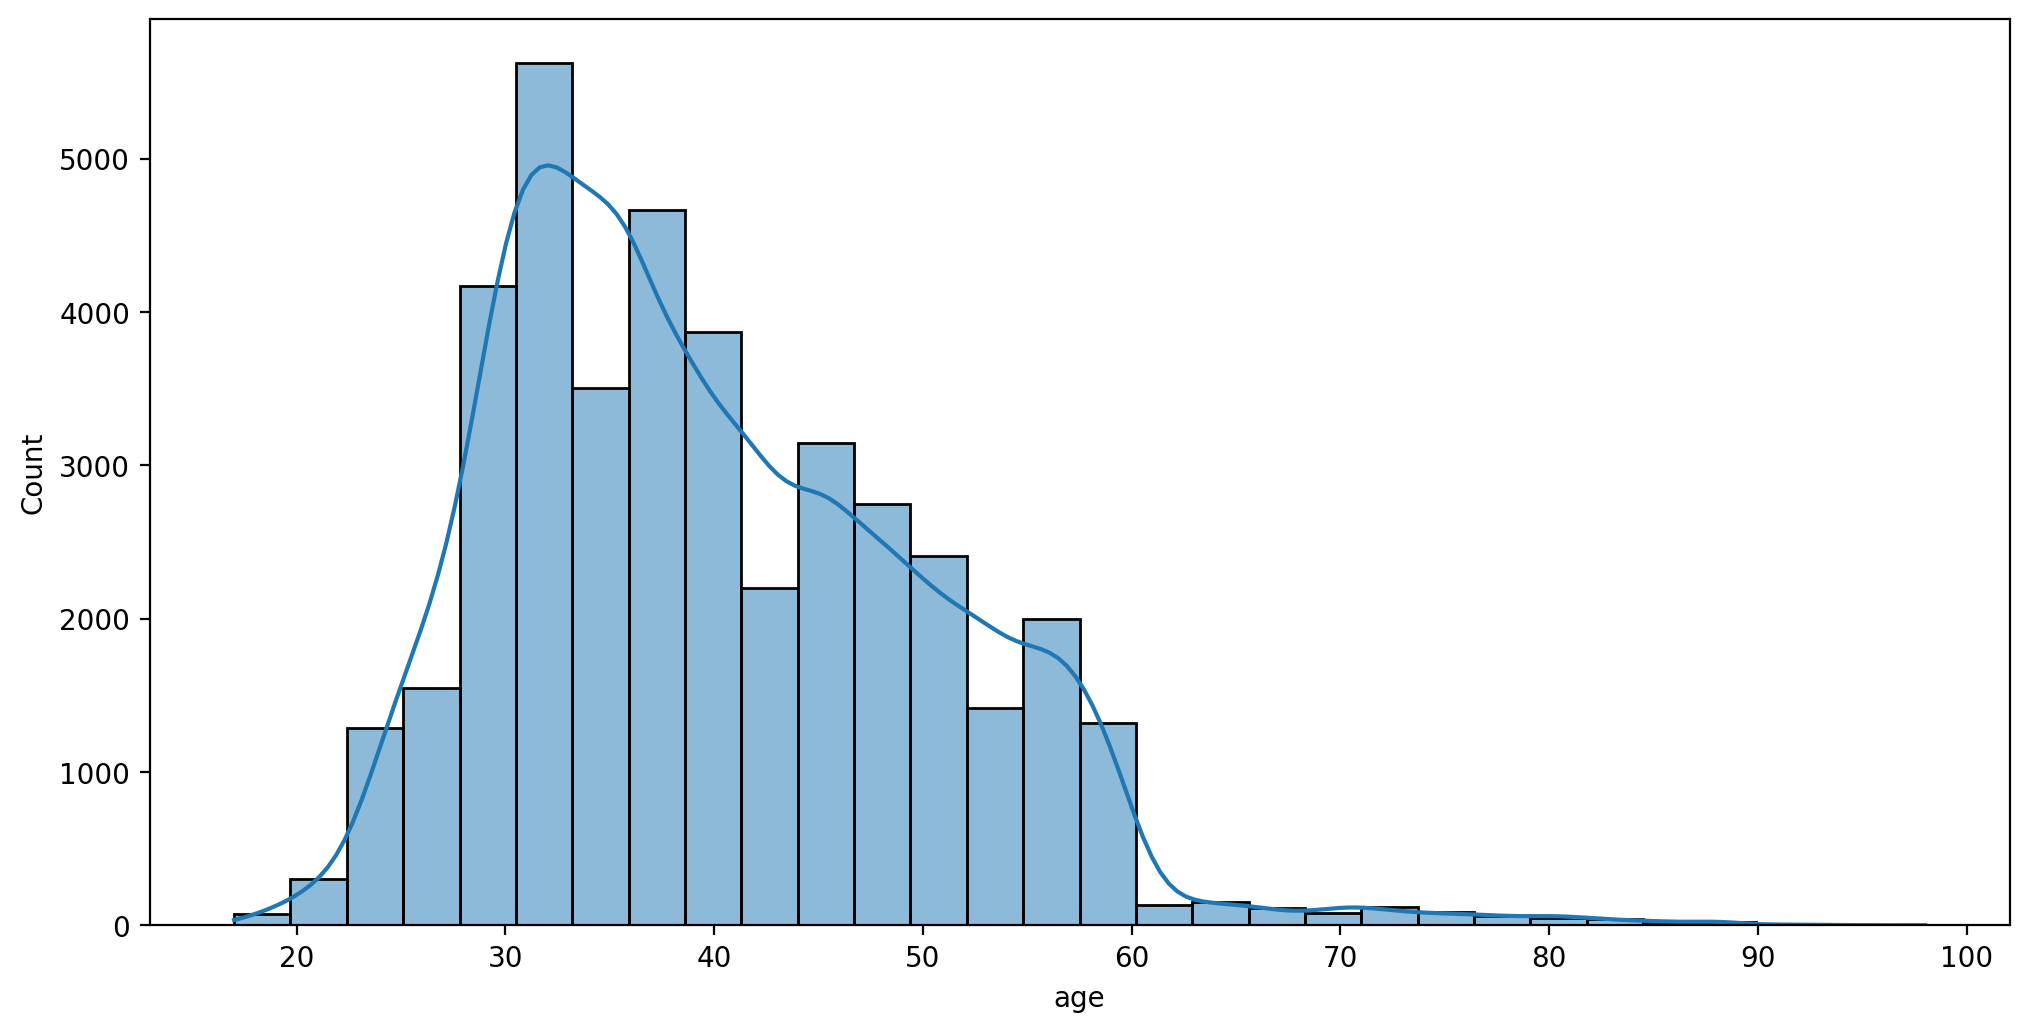

In [5]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'age', bins = 30, kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

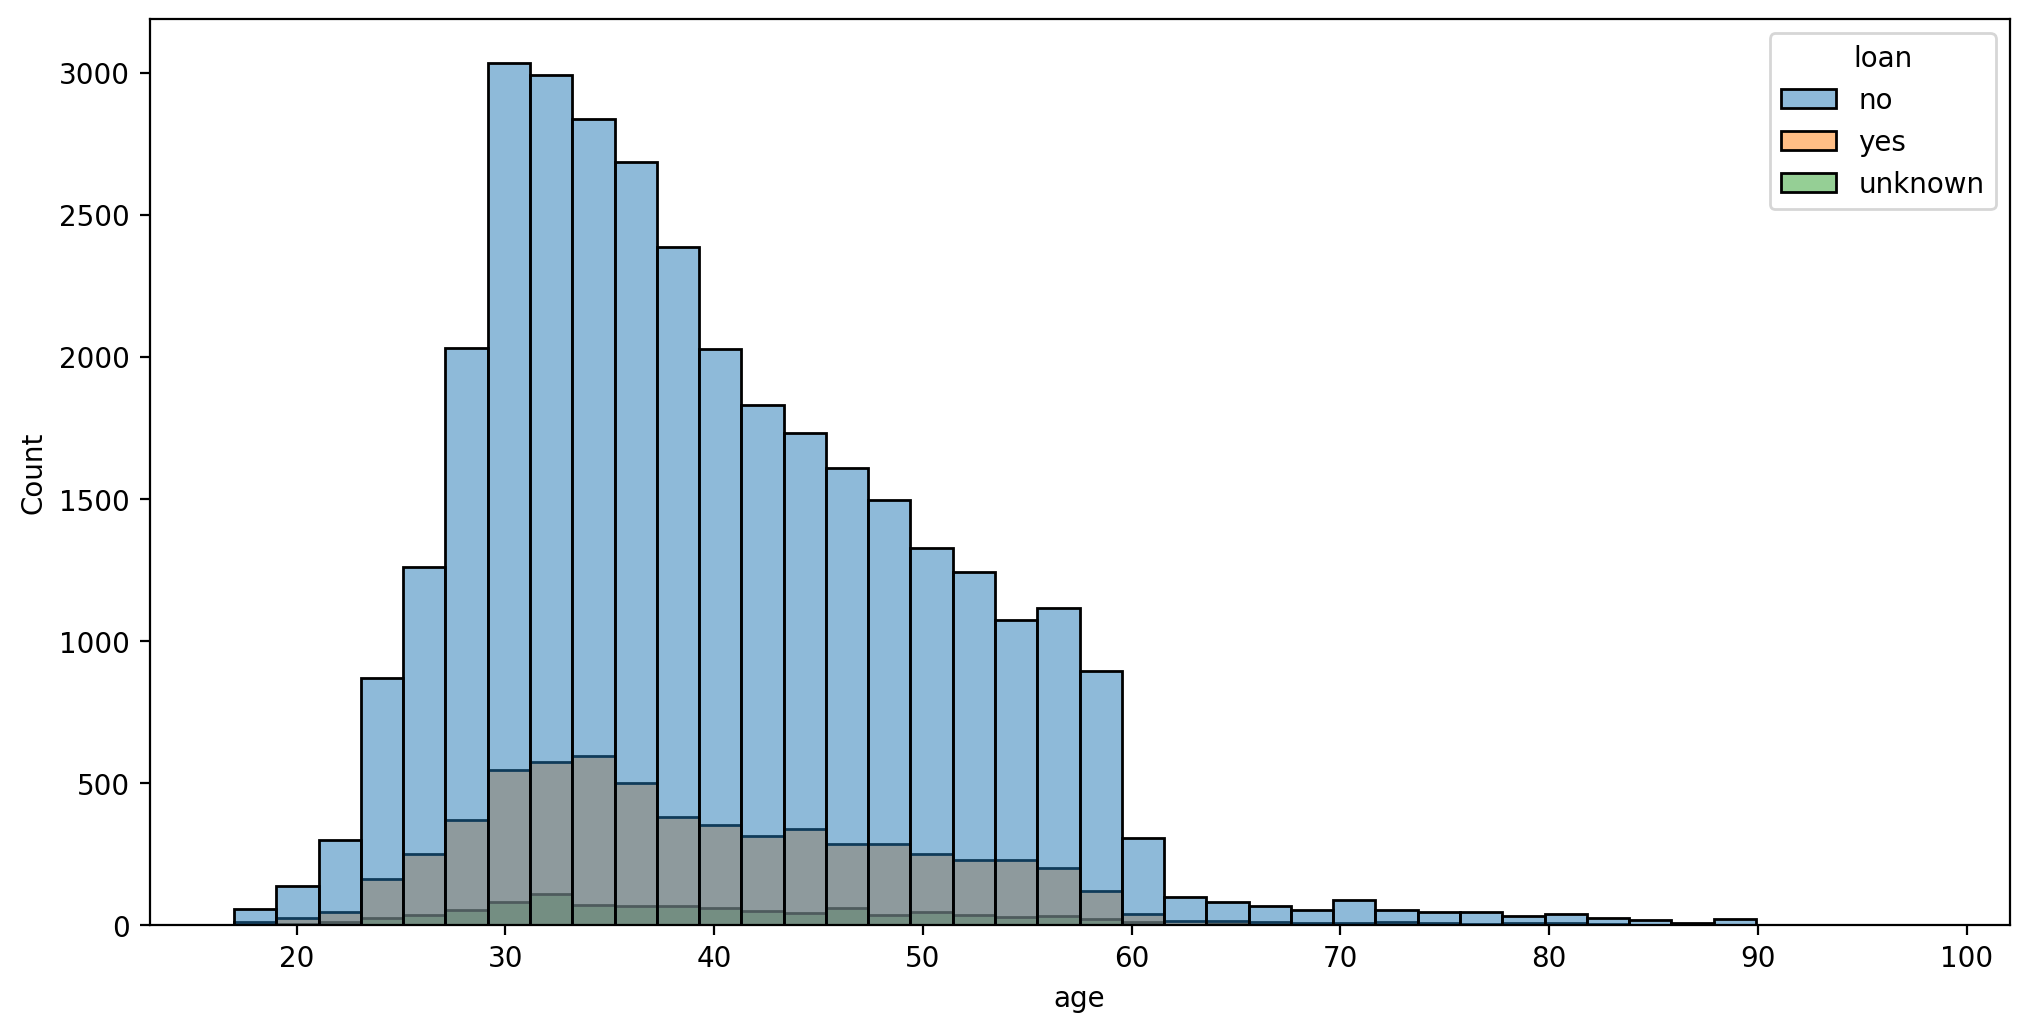

In [6]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'age', bins = 40, hue = 'loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

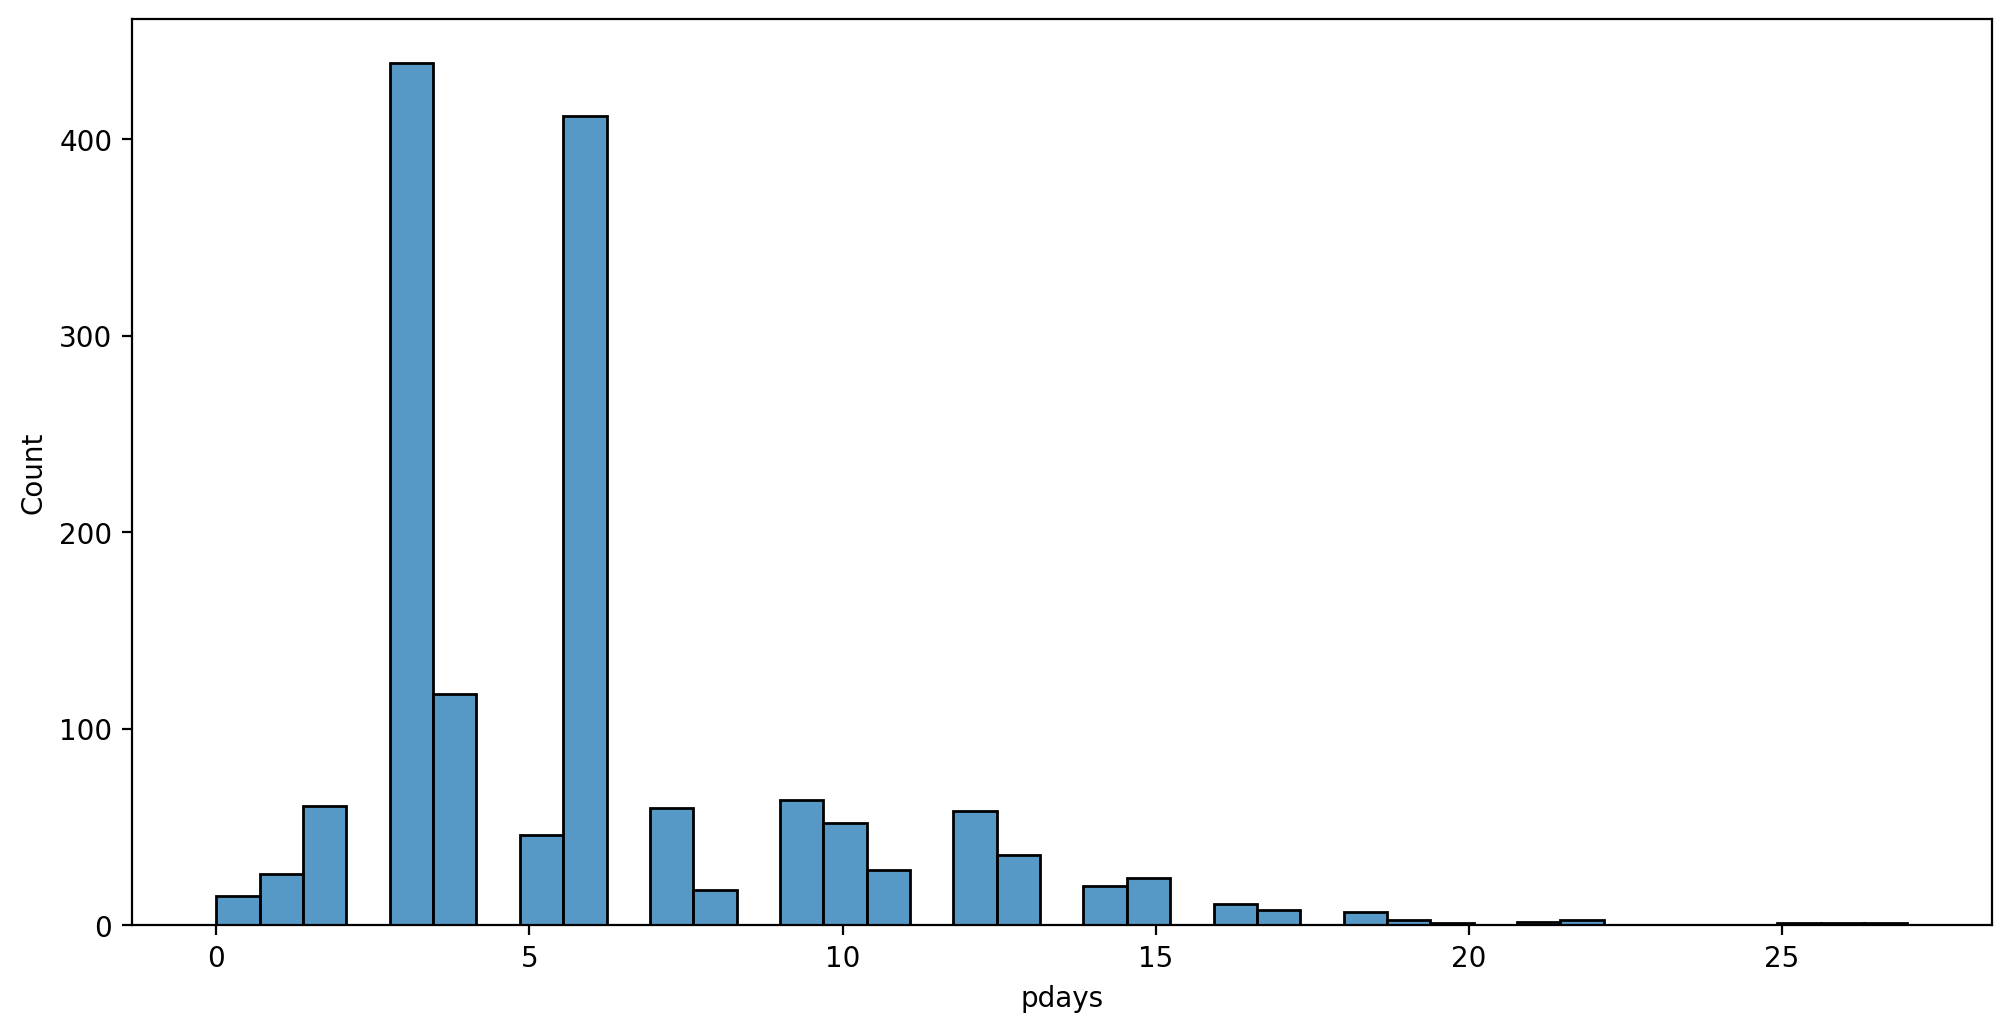

In [7]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df[df['pdays']!=999], x = 'pdays')

In [8]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [9]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

(0.0, 1000.0)

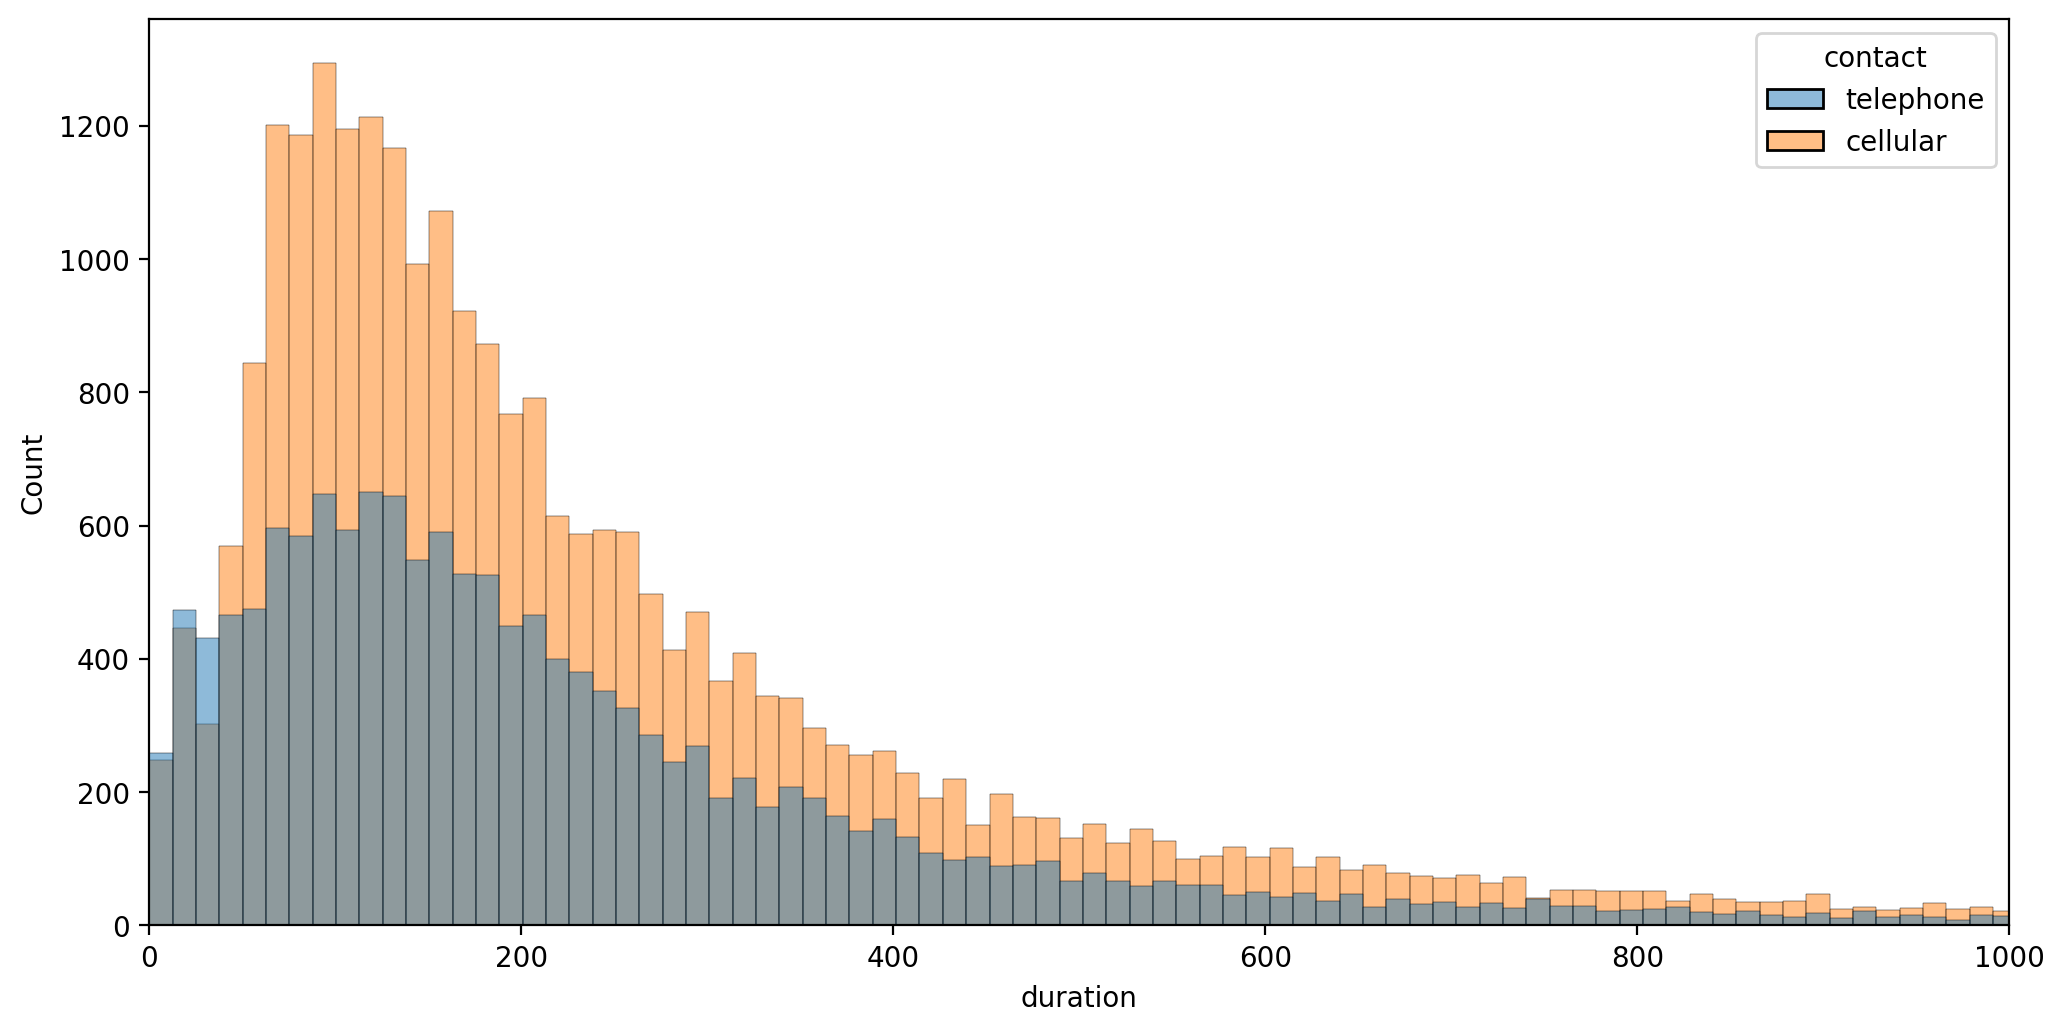

In [10]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x = 'duration', hue = 'contact')
plt.xlim(0, 1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

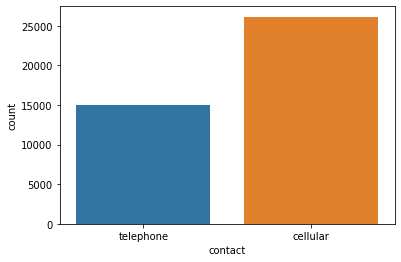

In [11]:
sns.countplot(data = df, x = 'contact')

In [12]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

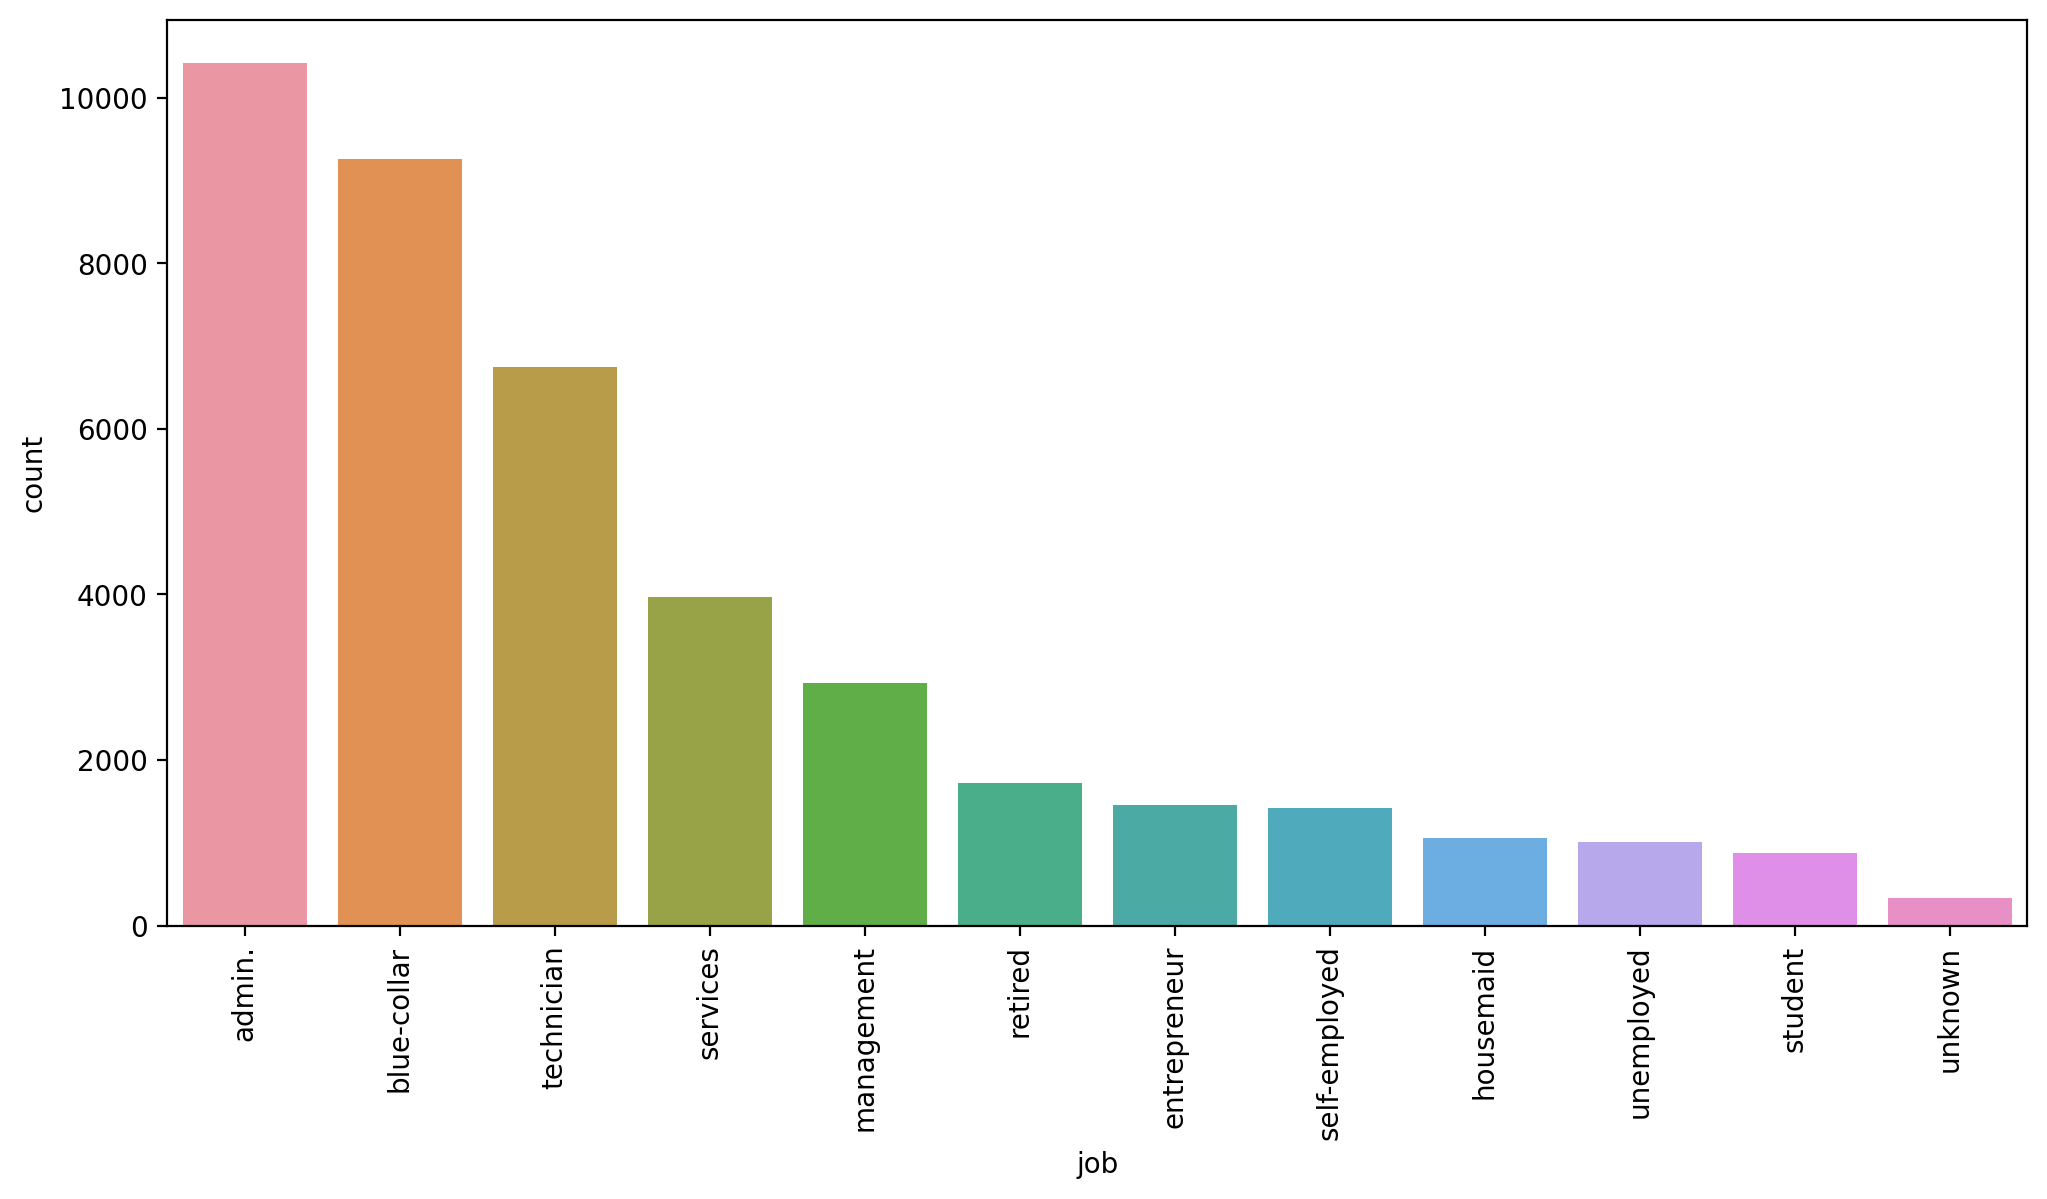

In [13]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.countplot(data = df, x = 'job', order = df['job'].value_counts().index)
plt.xticks(rotation = 90);

In [14]:
df['education'].value_counts().index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
      dtype='object')

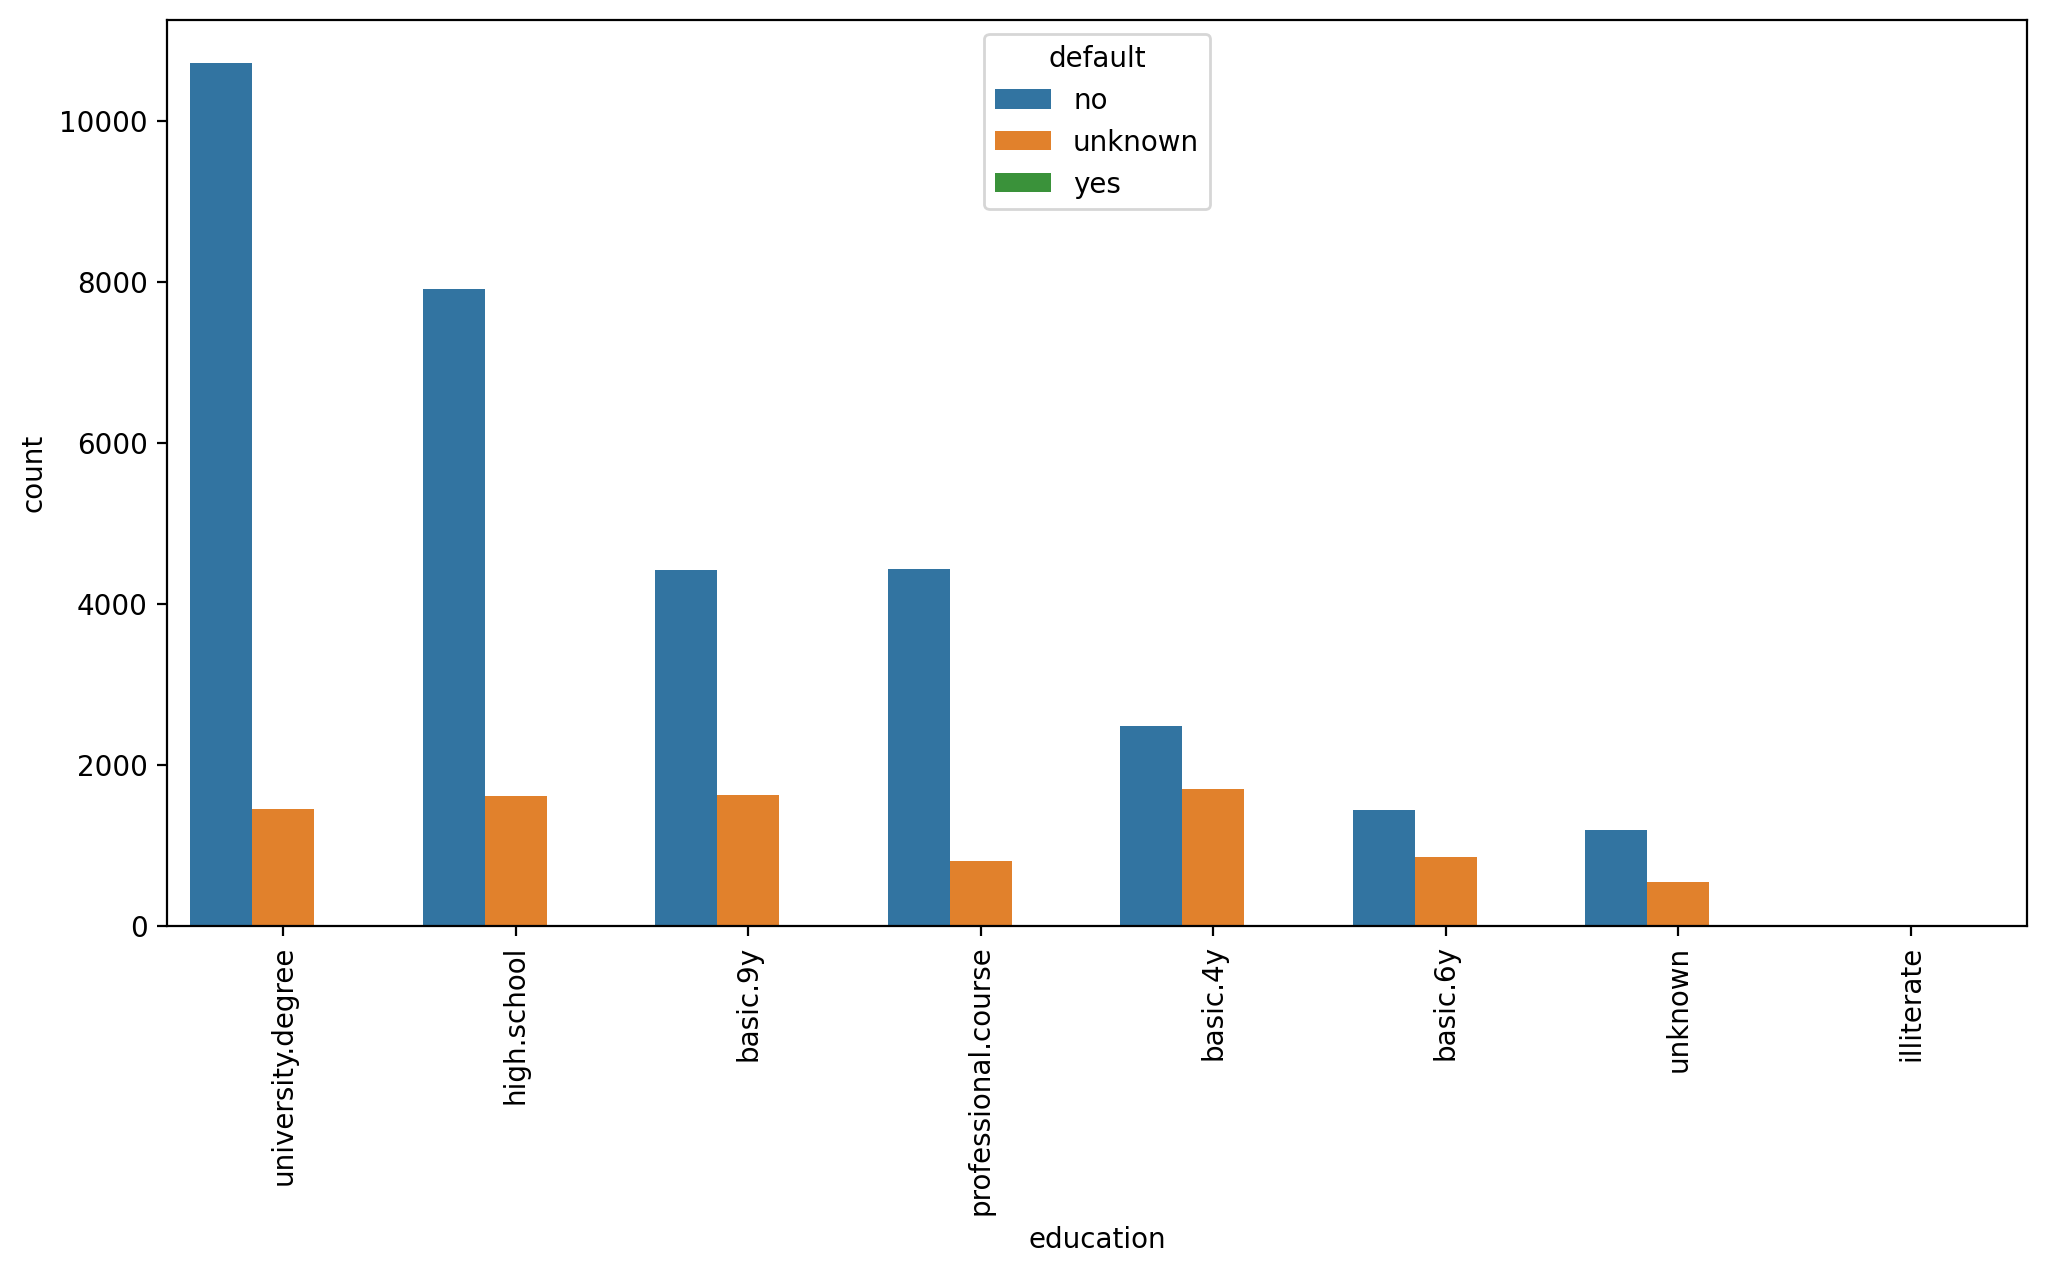

In [15]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.countplot(data = df, x = 'education', order = df['education'].value_counts().index, hue = 'default')
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='default', ylabel='count'>

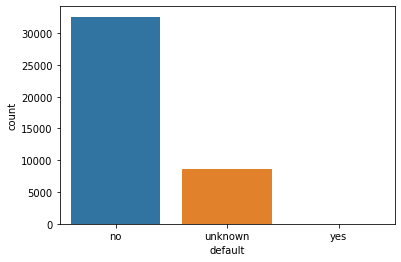

In [16]:
sns.countplot(data = df, x= 'default')

In [17]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

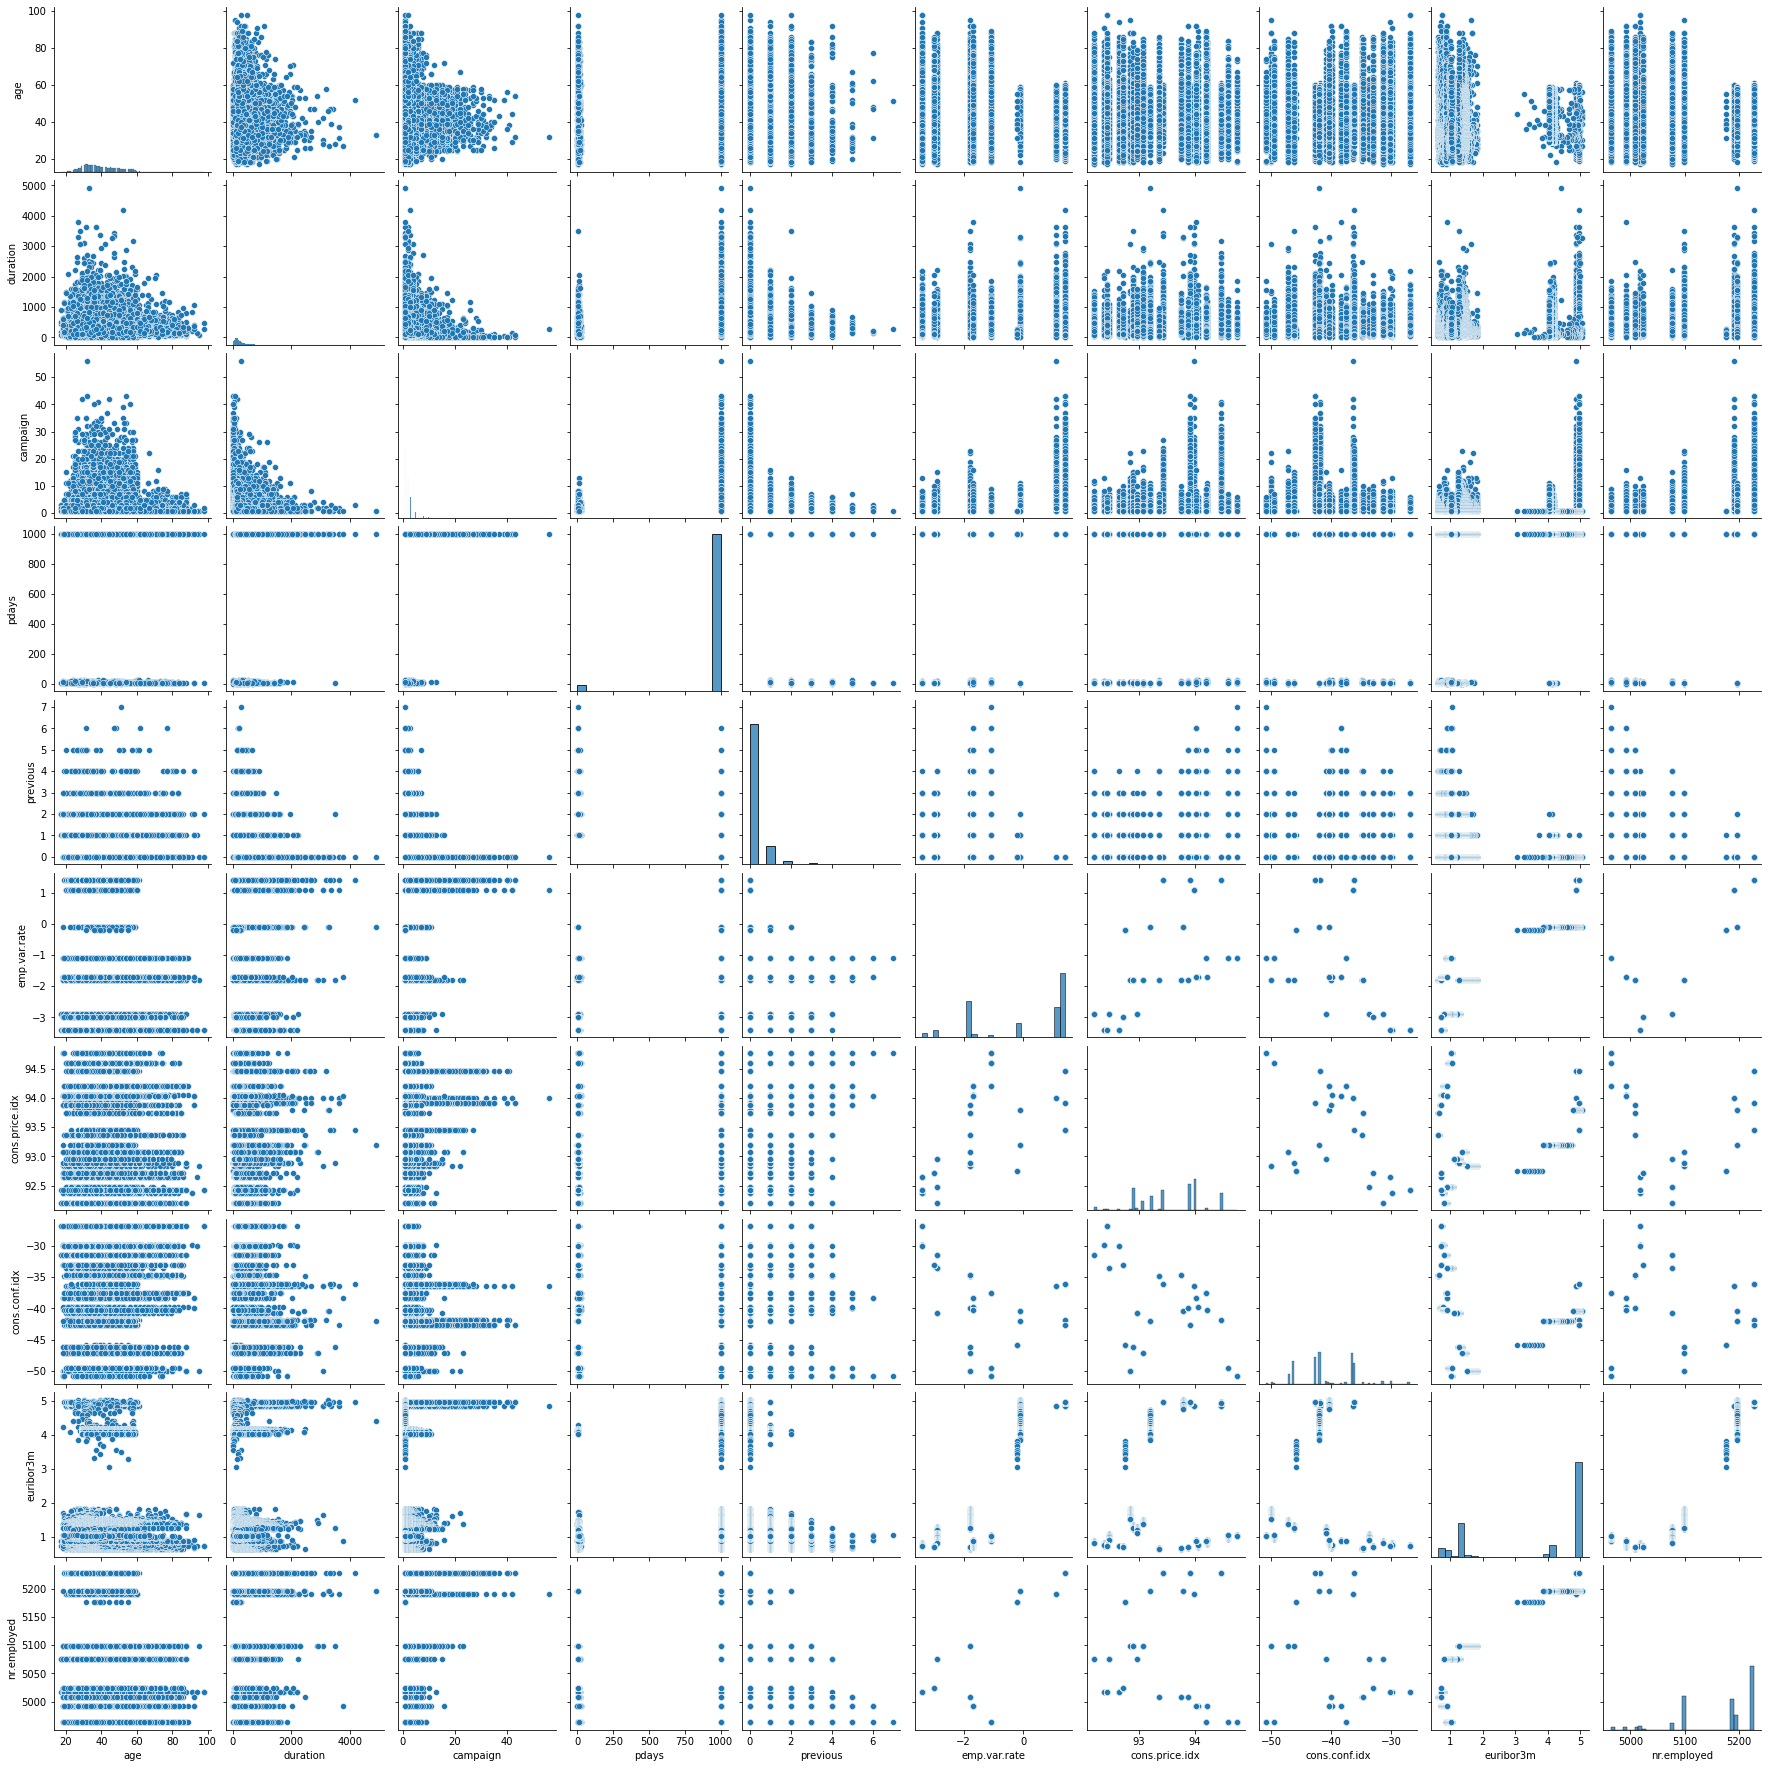

In [19]:
sns.pairplot(df)

In [20]:
X = pd.get_dummies(df)

In [21]:
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0              -36.4      4.857       5191.0  ...                0   
1              -36.4      4.857       5191.0  ...                0   
2              -36.4      4.857       5191.0  ...                0   
3              -36.4      4.857       5191.0  ...                0   
4              -36.4      4.857       5191.0  ...                0   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...                1   
41184          -50.8      1.028       4963.6  ...                1   
41185          -50.8      1.028       4963.6  ...                1   
41186          -50.8      1.028       4963.6  ...                1   
41187          -50.8      1.028       4963.6  ...                1   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                    1                0                0                0   
1                    1                0                0                0   
2                    1                0                0                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
41183                0                0                0                0   
41184                0                0                0                0   
41185                0                0                0                0   
41186                0                0                0                0   
41187                0                0                0                0   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                     0                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     1                 0   
4                     0                     1                 0   
...                 ...                   ...               ...   
41183                 0                     1                 0   
41184                 0                     1                 0   
41185                 0                     1                 0   
41186                 0                     1                 0   
41187                 1                     0                 0   

       subscribed_no  subscribed_yes  
0                  1               0  
1                  1               0  
2                  1               0  
3                  1               0  
4                  1               0  
...              ...             ...  
41183              0               1  
41184              1               0  
41185              1               0  
41186              0               1  
41187              1              

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

In [26]:
# help(KMeans)

In [27]:
model = KMeans(n_clusters=2)

In [28]:
# fit_transform 
cluster_labels = model.fit_predict(scaled_X)

In [29]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
X['Cluster'] = cluster_labels

In [31]:
# X

<AxesSubplot:>

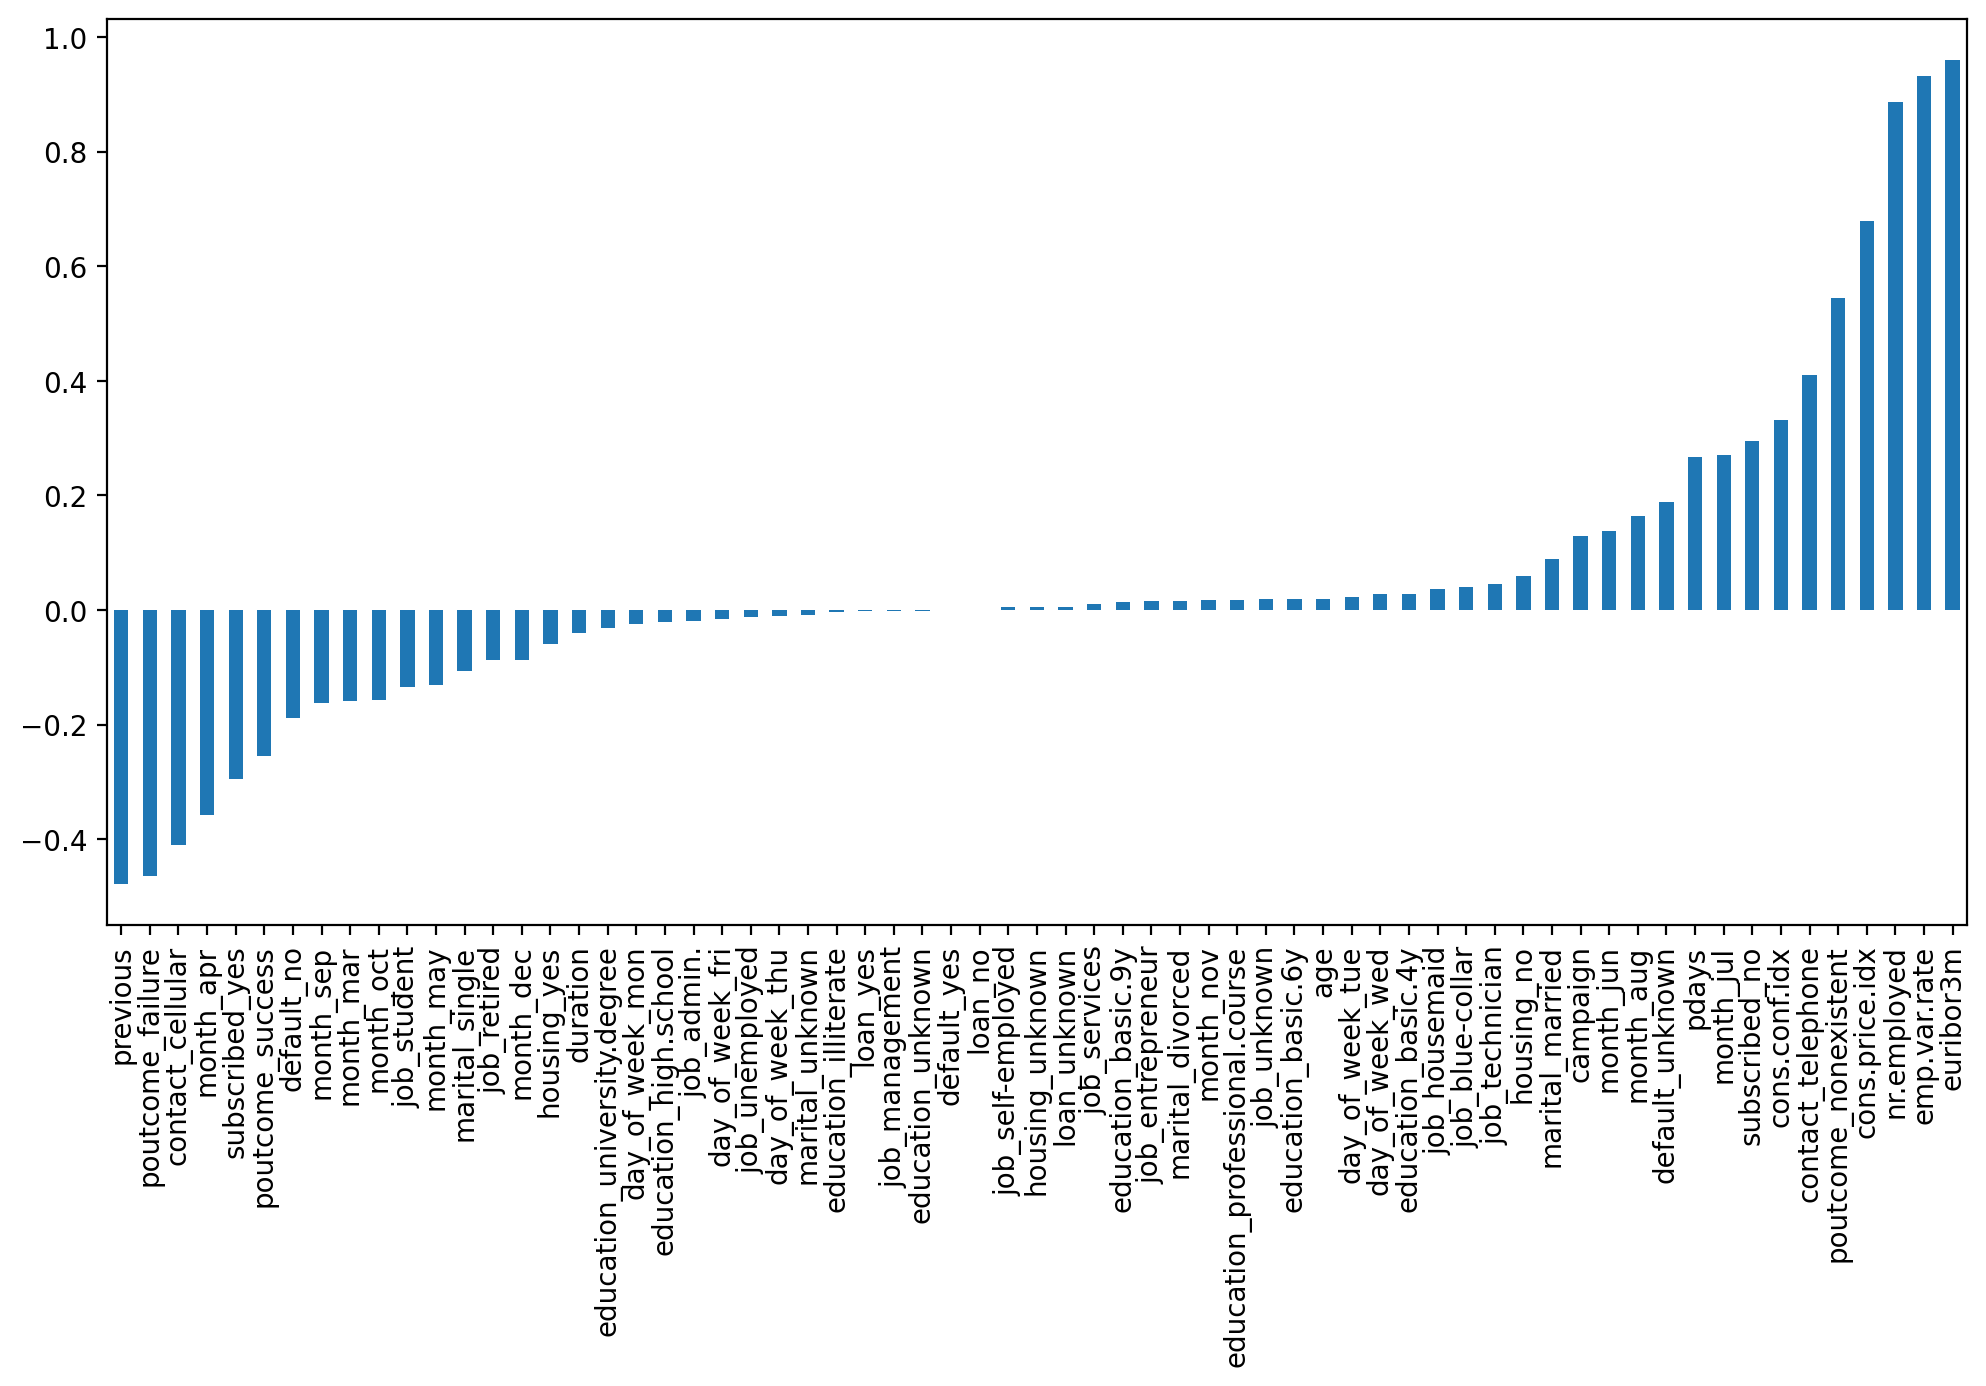

In [32]:
plt.figure(figsize = (12, 6), dpi = 200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind = 'bar')

In [34]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) # SSD point ---> cluster center

In [35]:
ssd

[2469792.3673020783,
 2370786.3634333,
 2271502.8742988873,
 2221549.3968403284,
 2149940.6177297253,
 2128443.6828619842,
 2029347.697975669,
 2012802.7715975347]

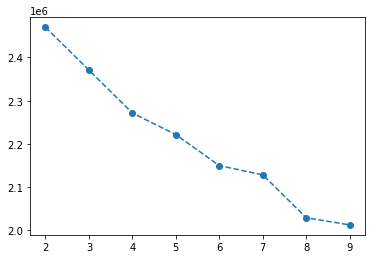

In [36]:
plt.plot(range(2, 10), ssd, 'o--')

In [40]:
pd.Series(ssd)

0    2.469792e+06
1    2.370786e+06
2    2.271503e+06
3    2.221549e+06
4    2.149941e+06
5    2.128444e+06
6    2.029348e+06
7    2.012803e+06
dtype: float64

In [41]:
pd.Series(ssd).diff() # difference

0             NaN
1   -99006.003869
2   -99283.489134
3   -49953.477459
4   -71608.779111
5   -21496.934868
6   -99095.984886
7   -16544.926378
dtype: float64